In [ ]:
# split prepared data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import shutil

# Paths
base_dir = "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data"
image_dir = os.path.join(base_dir, "images")
label_dir = os.path.join(base_dir, "labels")

train_img_dir = os.path.join(image_dir, "train")
val_img_dir = os.path.join(image_dir, "val")
train_lbl_dir = os.path.join(label_dir, "train")
val_lbl_dir = os.path.join(label_dir, "val")

# Create train/val dirs
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_lbl_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

# Get all image filenames
all_images = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Shuffle and split
random.seed(42)
random.shuffle(all_images)

split_idx = int(0.9 * len(all_images))
train_files = all_images[:split_idx]
val_files = all_images[split_idx:]

# Move files
def move_files(file_list, dest_img_dir, dest_lbl_dir):
    for fname in file_list:
        label_name = fname.replace(".jpg", ".txt")
        img_src = os.path.join(image_dir, fname)
        lbl_src = os.path.join(label_dir, label_name)

        img_dest = os.path.join(dest_img_dir, fname)
        lbl_dest = os.path.join(dest_lbl_dir, label_name)

        if os.path.exists(lbl_src):  # only move if label exists
            shutil.move(img_src, img_dest)
            shutil.move(lbl_src, lbl_dest)

move_files(train_files, train_img_dir, train_lbl_dir)
move_files(val_files, val_img_dir, val_lbl_dir)

print(f"✅ Done! Split {len(train_files)} for training and {len(val_files)} for validation.")

✅ Done! Split 972 for training and 108 for validation.


In [ ]:
import os

In [ ]:
len(os.listdir('/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/images/train'))

972

In [ ]:
len(os.listdir('/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/images/val'))

108

In [ ]:
len(os.listdir('/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/train'))

972

In [ ]:
len(os.listdir('/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/val'))

108

In [ ]:
ls /content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/images/train | head

001003_person0.jpg
001003_person1.jpg
001029_person0.jpg
001038_person0.jpg
001038_person1.jpg
001042_person0.jpg
001042_person10.jpg
001042_person1.jpg
001042_person2.jpg
001042_person3.jpg


In [ ]:
ls /content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/train | head

001003_person0.txt
001003_person1.txt
001029_person0.txt
001038_person0.txt
001038_person1.txt
001042_person0.txt
001042_person10.txt
001042_person1.txt
001042_person2.txt
001042_person3.txt


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import glob

train_label_dir = "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/train"
val_label_dir = "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/val"

label_files = glob.glob(train_label_dir + "/*.txt") + glob.glob(val_label_dir + "/*.txt")

class_counts = {i: 0 for i in range(10)}  # Assuming 10 classes (person + PPE)

for file in label_files:
    with open(file, "r") as f:
        for line in f:
            class_id = int(line.split()[0])
            class_counts[class_id] += 1

print("Class distribution:", class_counts)


Class distribution: {0: 0, 1: 841, 2: 251, 3: 4, 4: 0, 5: 676, 6: 205, 7: 284, 8: 0, 9: 0}


In [ ]:
import glob

# Directories containing label files
label_dirs = [
    "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/train",
    "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/labels/val",
]

for label_dir in label_dirs:
    label_files = glob.glob(label_dir + "/*.txt")

    for file in label_files:
        with open(file, "r") as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            parts = line.split()
            new_class_id = int(parts[0]) - 1  # Shift class index down

            if new_class_id < 0:
                print(f"⚠️ Warning: Negative class index in {file}")
                continue  # Skip invalid labels

            parts[0] = str(new_class_id)
            new_lines.append(" ".join(parts))

        # Overwrite with corrected labels
        with open(file, "w") as f:
            f.write("\n".join(new_lines))

In [ ]:
from ultralytics import YOLO

# Path to your YAML data config
data_yaml = "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/ppe.yaml"

# Initialize model from architecture (not pretrained weights)
model = YOLO("yolov8m.yaml")  # or yolov8n.yaml / yolov8s.yaml if you want smaller models

# Train model from scratch
model.train(
    data=data_yaml,
    epochs=100,
    imgsz=640,
    batch=16,
    name="PPE_detection_from_scratch",
    optimizer="Adam",
    pretrained=False,          # Ensures no pretrained weights are used
    device=0,                  # Set to GPU:0
    deterministic=True,        # Ensures reproducibility
    augment=True,              # Enable data augmentation
    cos_lr=True,               # Cosine learning rate scheduling
    close_mosaic=10            # Close mosaic augmentation after 10 epochs
)


Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/ppe.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=PPE_detection_from_scratch, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

train: Scanning /content/drive/.shortcut-targets-by-id/11-ZyxtJo4aB1htanr8CQ5lBUmMImjDwQ/Syook/datasets/data_split/PPE_train_data/labels/train... 971 images, 178 backgrounds, 1 corrupt: 100%|██████████| 972/972 [00:07<00:00, 124.83it/s]

train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/11-ZyxtJo4aB1htanr8CQ5lBUmMImjDwQ/Syook/datasets/data_split/PPE_train_data/images/train/005003_person3.jpg: ignoring corrupt image/label: image size (82, 7) <10 pixels


train: New cache created: /content/drive/.shortcut-targets-by-id/11-ZyxtJo4aB1htanr8CQ5lBUmMImjDwQ/Syook/datasets/data_split/PPE_train_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/11-ZyxtJo4aB1htanr8CQ5lBUmMImjDwQ/Syook/datasets/data_split/PPE_train_data/labels/val... 107 images, 22 backgrounds, 1 corrupt: 100%|██████████| 108/108 [00:02<00:00, 37.68it/s]

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/11-ZyxtJo4aB1htanr8CQ5lBUmMImjDwQ/Syook/datasets/data_split/PPE_train_data/images/val/001305_person3.jpg: ignoring corrupt image/label: image size (21, 6) <10 pixels


val: New cache created: /content/drive/.shortcut-targets-by-id/11-ZyxtJo4aB1htanr8CQ5lBUmMImjDwQ/Syook/datasets/data_split/PPE_train_data/labels/val.cache
Plotting labels to runs/detect/PPE_detection_from_scratch/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/PPE_detection_from_scratch
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.28G      3.445      4.021      3.484         59        640: 100%|██████████| 61/61 [00:35<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        107        232          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.76G      3.194       3.58      3.061         39        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        107        232    0.00234      0.318    0.00719    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.76G      2.916      3.513      2.946         44        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        107        232      0.688     0.0316     0.0404     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.76G      2.703      3.342      2.809         53        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        107        232      0.675       0.14      0.037     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.76G      2.581      3.281      2.752         45        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232      0.704     0.0649      0.044     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.29G      2.442       3.18      2.655         47        640: 100%|██████████| 61/61 [00:33<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        107        232      0.867     0.0461     0.0245    0.00881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.36G      2.385      3.184      2.633         54        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        107        232      0.898     0.0404      0.055     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.42G      2.273      3.075      2.539         51        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        107        232      0.572     0.0561     0.0577     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.49G      2.245      2.993      2.518         36        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all        107        232      0.737     0.0579     0.0743     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.56G      2.216      2.902      2.476         72        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        107        232       0.59      0.102      0.121     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.11G      2.181      2.922      2.446         38        640: 100%|██████████| 61/61 [00:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        107        232      0.598     0.0976      0.101     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.18G      2.115      2.808      2.353         55        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        107        232      0.429      0.105      0.114     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.25G      2.019      2.727      2.304         52        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        107        232       0.62     0.0597     0.0713     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.31G      2.025      2.685      2.323         59        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232       0.79      0.112      0.144     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.38G      1.974      2.671      2.271         48        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        107        232      0.615     0.0588     0.0735     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.45G      1.943      2.602      2.243         78        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        107        232      0.342      0.145      0.123     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.51G      1.914       2.52      2.165         57        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


                   all        107        232       0.65      0.104      0.138      0.063

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.1G      1.897       2.52      2.182         56        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        107        232      0.551      0.148      0.163     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.1G      1.842      2.514      2.125         51        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        107        232      0.623      0.131      0.145     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.2G       1.81      2.476        2.1         47        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


                   all        107        232      0.493      0.174      0.191     0.0961

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.3G       1.82      2.482      2.122         39        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        107        232      0.488      0.129      0.155     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.3G      1.771      2.393      2.058         42        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]


                   all        107        232      0.475      0.164      0.186     0.0886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.4G       1.76      2.327      2.045         52        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.371      0.244       0.17     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.5G       1.73      2.337      2.026         38        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        107        232      0.643      0.157       0.17     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.5G      1.724      2.334      2.013         58        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        107        232      0.658      0.143      0.202     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.1G      1.714      2.318      2.024         58        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        107        232      0.419      0.198       0.24      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.2G        1.7      2.245      1.994         56        640: 100%|██████████| 61/61 [00:33<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        107        232      0.377      0.183      0.198      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G      1.723      2.274      2.031         51        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        107        232      0.319      0.287      0.269      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.3G      1.664      2.245      1.952         57        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        107        232      0.391      0.289       0.23      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.4G      1.621      2.127      1.927         54        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all        107        232       0.77      0.239      0.277      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.9G      1.636      2.136      1.907         50        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        107        232      0.414      0.261      0.197       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        12G      1.635      2.111      1.925         67        640: 100%|██████████| 61/61 [00:33<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        107        232      0.353      0.299      0.232      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100        12G      1.596      2.106      1.878         40        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        107        232      0.242      0.367      0.213      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.1G      1.601      2.062      1.908         50        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        107        232       0.49      0.178      0.219      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.2G      1.596      2.104      1.898         50        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232      0.712      0.206      0.246      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.2G       1.56      2.048      1.853         59        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        107        232       0.43      0.272      0.259      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.3G      1.567      2.018      1.856         57        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        107        232      0.295      0.338      0.269      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.5G      1.543       2.03      1.813         58        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        107        232      0.441      0.249      0.277      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.6G      1.553      1.965      1.829         41        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


                   all        107        232        0.3      0.239      0.248      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.8G       1.54      2.004      1.848         37        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        107        232      0.433       0.25      0.286      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.9G      1.518       1.99      1.802         53        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        107        232      0.498      0.295      0.313      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        13G      1.489      1.904      1.802         49        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        107        232      0.429      0.275      0.319      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.2G      1.477       1.89      1.782         54        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        107        232      0.694      0.282      0.295       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.4G      1.503      1.937      1.816         55        640: 100%|██████████| 61/61 [00:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        107        232      0.457      0.303      0.312      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.02G      1.496      1.886      1.781         41        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        107        232      0.431      0.318      0.287      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.02G      1.434      1.824      1.749         38        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.505      0.374      0.396      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.02G      1.439      1.805      1.725         42        640: 100%|██████████| 61/61 [00:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        107        232      0.282      0.344      0.281      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.02G      1.441       1.87      1.769         35        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        107        232      0.501      0.356      0.347      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.02G      1.437      1.827      1.729         66        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.389      0.346      0.325      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.02G       1.42      1.805      1.714         71        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        107        232      0.412      0.357      0.322      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.11G        1.4      1.746      1.691         48        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all        107        232      0.317      0.385      0.347      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.2G      1.399      1.731      1.699         55        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        107        232      0.592      0.367       0.35      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.28G      1.398      1.736      1.705         31        640: 100%|██████████| 61/61 [00:33<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        107        232      0.481      0.357      0.416      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.37G      1.381      1.715      1.672         48        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        107        232      0.541      0.363      0.339       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.47G      1.366      1.677      1.675         54        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        107        232      0.261      0.331      0.326      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.57G      1.343      1.666       1.63         59        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        107        232      0.473      0.371      0.318      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.72G      1.312      1.619       1.63         63        640: 100%|██████████| 61/61 [00:33<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        107        232      0.524      0.448      0.541      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.89G      1.336      1.609      1.637         49        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        107        232      0.627      0.357      0.412      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.99G      1.305      1.624      1.631         47        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        107        232       0.39      0.342      0.356      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.17G      1.293      1.573      1.609         47        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        107        232      0.611      0.365      0.375      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       8.3G      1.302      1.576       1.61         41        640: 100%|██████████| 61/61 [00:33<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        107        232      0.521      0.297      0.355      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.46G      1.281      1.537      1.595         61        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        107        232      0.493      0.381      0.359      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.61G      1.283      1.545      1.586         37        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        107        232      0.533      0.464      0.568      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.77G      1.282       1.52      1.588         49        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.549      0.378      0.353      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.91G       1.28      1.543      1.585         43        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.617      0.374      0.477      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.06G      1.279      1.528      1.579         42        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        107        232      0.539       0.41      0.483       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       9.2G      1.253      1.519      1.573         63        640: 100%|██████████| 61/61 [00:33<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        107        232      0.574       0.37       0.56      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.37G       1.23      1.496      1.572         39        640: 100%|██████████| 61/61 [00:33<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]


                   all        107        232      0.519      0.447      0.555      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.53G      1.242      1.485      1.555         60        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        107        232      0.568      0.396      0.553      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.1G       1.17      1.423      1.519         52        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232      0.599      0.516      0.545      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.1G      1.205      1.437      1.542         46        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]

                   all        107        232      0.582      0.489      0.559      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.2G      1.207      1.422      1.521         36        640: 100%|██████████| 61/61 [00:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232      0.463      0.385      0.414      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.3G      1.187      1.407      1.517         42        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        107        232      0.557      0.403      0.571      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.3G      1.187      1.407      1.504         43        640: 100%|██████████| 61/61 [00:33<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        107        232      0.674      0.376      0.575      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.4G      1.182      1.396      1.503         51        640: 100%|██████████| 61/61 [00:34<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        107        232      0.654      0.459      0.598      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.5G      1.162      1.347      1.485         49        640: 100%|██████████| 61/61 [00:33<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        107        232      0.716      0.408      0.579       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.7G      1.161      1.351      1.488         72        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        107        232      0.582      0.403      0.547       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.3G       1.14      1.349      1.483         39        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all        107        232       0.51      0.509      0.563      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.3G      1.139      1.309      1.472         48        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.574      0.422      0.464      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.4G      1.142      1.339      1.477         33        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        107        232      0.697      0.447      0.524      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.5G      1.106      1.268      1.451         46        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        107        232      0.674      0.437      0.606       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.5G      1.107      1.292      1.465         47        640: 100%|██████████| 61/61 [00:32<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]

                   all        107        232      0.573       0.46      0.582      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.6G      1.107      1.301      1.448         55        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        107        232      0.516      0.615      0.577       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.7G      1.106      1.296       1.46         61        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        107        232      0.591      0.469      0.582      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.9G      1.094      1.255      1.446         56        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        107        232      0.481      0.661      0.565      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        12G      1.101      1.272      1.436         47        640: 100%|██████████| 61/61 [00:33<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        107        232      0.485      0.659      0.586      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.6G      1.089      1.262      1.436         53        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232      0.415      0.726      0.611      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.7G      1.068      1.221      1.424         44        640: 100%|██████████| 61/61 [00:33<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        107        232      0.632      0.404      0.601      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.7G      1.072      1.225      1.425         30        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.432      0.696      0.577      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.8G      1.059      1.237      1.429         48        640: 100%|██████████| 61/61 [00:34<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        107        232      0.514       0.67      0.581      0.435


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.9G      1.098      1.319      1.481         22        640: 100%|██████████| 61/61 [00:34<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        107        232      0.614      0.548      0.575      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.9G      1.086      1.235      1.455         31        640: 100%|██████████| 61/61 [00:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        107        232      0.635      0.628      0.612      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.1G      1.076      1.202      1.444         30        640: 100%|██████████| 61/61 [00:32<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        107        232      0.754      0.545      0.601      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.2G      1.039      1.177      1.429         23        640: 100%|██████████| 61/61 [00:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        107        232      0.667      0.585      0.613      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.4G      1.026       1.18      1.418         32        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        107        232       0.67      0.578      0.612      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.54G      1.027      1.145       1.42         23        640: 100%|██████████| 61/61 [00:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        107        232      0.707      0.564      0.613      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.61G      1.007      1.134      1.397         22        640: 100%|██████████| 61/61 [00:32<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        107        232      0.666      0.612       0.61      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.67G      1.032      1.116      1.406         15        640: 100%|██████████| 61/61 [00:32<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        107        232      0.582      0.644      0.603      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.74G      1.023      1.135      1.412         25        640: 100%|██████████| 61/61 [00:32<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        107        232      0.631      0.613      0.613      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.84G      1.021      1.142      1.417         23        640: 100%|██████████| 61/61 [00:33<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        107        232      0.665       0.57      0.613      0.436



100 epochs completed in 1.004 hours.
Optimizer stripped from runs/detect/PPE_detection_from_scratch/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/PPE_detection_from_scratch/weights/best.pt, 52.0MB

Validating runs/detect/PPE_detection_from_scratch/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


                   all        107        232      0.655      0.591      0.613      0.415
              hard-hat         67         95      0.864      0.863      0.923      0.685
                gloves         16         21      0.572      0.256      0.281      0.152
                  mask          1          1      0.856          1      0.995      0.697
                 boots         41         79       0.67      0.488      0.571      0.265
                  vest         13         16      0.541      0.438      0.504      0.372
              PPE suit         17         20      0.424        0.5      0.406      0.316
Speed: 0.1ms preprocess, 36.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/PPE_detection_from_scratch


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78589770bb90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

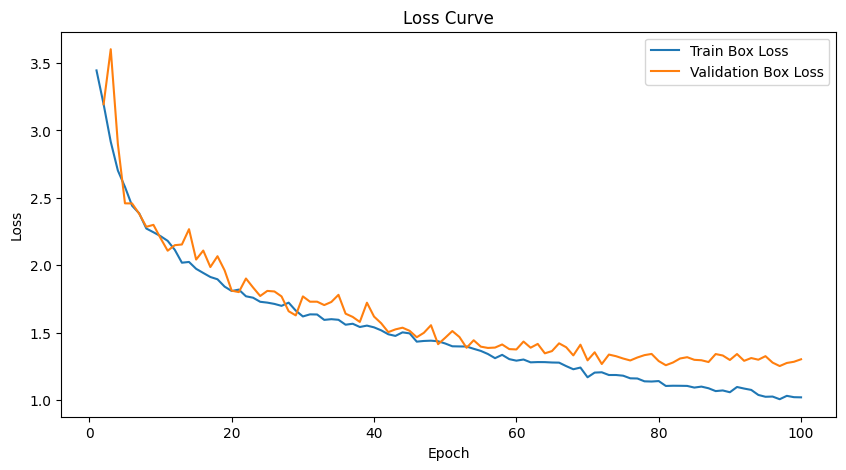

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
df = pd.read_csv('//content/runs/detect/PPE_detection_from_scratch/results.csv')

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label="Train Box Loss")
plt.plot(df['epoch'], df['val/box_loss'], label="Validation Box Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


0: 640x256 3 hard-hats, 19.2ms
Speed: 1.5ms preprocess, 19.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 256)


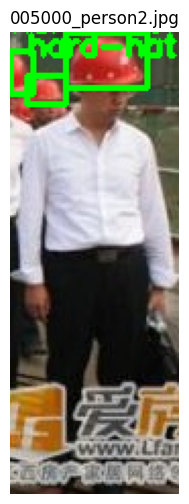


0: 640x448 1 hard-hat, 1 boots, 43.9ms
Speed: 4.6ms preprocess, 43.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


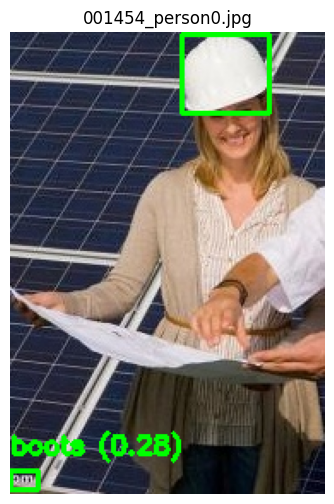


0: 640x224 (no detections), 20.0ms
Speed: 1.5ms preprocess, 20.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 224)


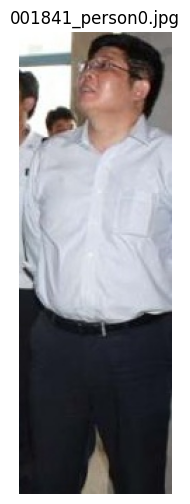


0: 640x224 1 hard-hat, 18.6ms
Speed: 1.5ms preprocess, 18.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 224)


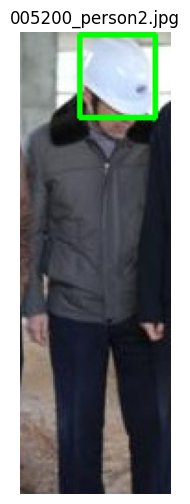


0: 640x224 (no detections), 17.4ms
Speed: 1.4ms preprocess, 17.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 224)


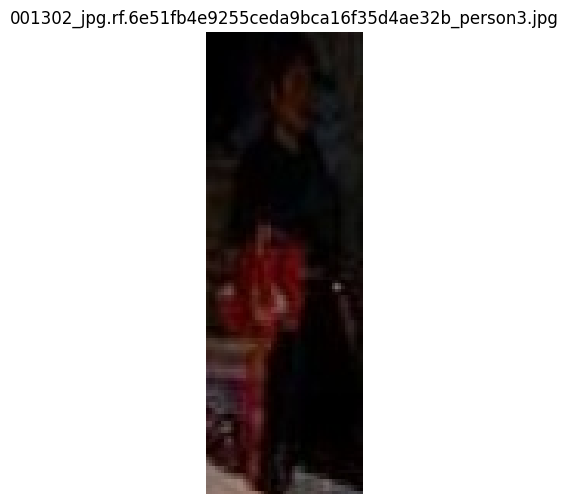

In [ ]:
from ultralytics import YOLO
import cv2
import glob
import random
import matplotlib.pyplot as plt

# Load trained PPE detection model
ppe_model_path = "/content/drive/MyDrive/Syook/datasets/runs_2/PPE_detection_from_scratch/weights/best.pt"
ppe_model = YOLO(ppe_model_path)

# Get a list of validation images
val_image_dir = "/content/drive/MyDrive/Syook/datasets/data_split/PPE_train_data/images/val"
image_paths = glob.glob(f"{val_image_dir}/*.jpg")
sample_images = random.sample(image_paths, min(5, len(image_paths)))  # Pick 5 random images

# Use the model's internal class names directly
class_names = ppe_model.names  # This gives a dict {0: 'hard-hat', ..., 8: 'safety-harness'}

# Run inference and display results
for img_path in sample_images:
    img = cv2.imread(img_path)
    results = ppe_model(img)[0]

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls)
        conf = float(box.conf)
        class_name = class_names.get(cls, f"Class {cls}")

        label = f"{class_name} ({conf:.2f})"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(img_path.split("/")[-1])
    plt.show()

In [ ]:
print(model.names)  # Check how YOLO recognizes class indices

{0: 'hard-hat', 1: 'gloves', 2: 'mask', 3: 'glasses', 4: 'boots', 5: 'vest', 6: 'PPE suit', 7: 'ear protector', 8: 'safety harness'}


In [ ]:
import shutil
import os

# Define source and destination directories
source_dirs = ["/content/drive/MyDrive/PPE_detection_from_scratch"]
destination_dir = "/content/drive/MyDrive/Syook/datasets/runs_2"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)


# Move the directories
for source_dir in source_dirs:
  destination_path = os.path.join(destination_dir, os.path.basename(source_dir))
  shutil.move(source_dir, destination_path)
  print(f"Moved '{source_dir}' to '{destination_path}'")

Moved '/content/drive/MyDrive/PPE_detection_from_scratch' to '/content/drive/MyDrive/Syook/datasets/runs_2/PPE_detection_from_scratch'
